Child Mind Institute — Problematic Internet Use
Senior Project 
Jonathan Garcia 

In [400]:
import warnings
# Disable all warning messages
warnings.filterwarnings("ignore")

In [402]:
# Import libraries we will use and give them alias name ex. pd
import pandas as pd
import numpy as np

In [404]:
pd.options.display.max_colwidth = 1005 # this allows us to see more columns
pd.options.display.max_rows = 1005 # this allows us to see more rows

In [406]:
#Load the Data
# read from text file
df_Childmi = pd.read_csv("Child_train.csv", nrows=1000) #panda data frame

In [408]:
# print dataset
df_Childmi

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2.0,NaN
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0,NaN
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
# 2. examine data types
df_Childmi.dtypes #Pandas data types, object corresponds String data type in Python

id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
CGAS-CGAS_Score                           float64
Physical-Season                            object
Physical-BMI                              float64
Physical-Height                           float64
Physical-Weight                           float64
Physical-Waist_Circumference              float64
Physical-Diastolic_BP                     float64
Physical-HeartRate                        float64
Physical-Systolic_BP                      float64
Fitness_Endurance-Season                   object
Fitness_Endurance-Max_Stage               float64
Fitness_Endurance-Time_Mins               float64
Fitness_Endurance-Time_Sec                float64
FGC-Season                                 object
FGC-FGC_CU                                float64


In [414]:
# encode string values to integers
from sklearn.preprocessing import LabelEncoder

# maintain a dict for string to integer mappings for each column
label_dict = dict()

for var_name in df_Childmi.columns:   
    # only map string values
    if df_Childmi[var_name].dtype == object:
        le = LabelEncoder()
        # map the string values
        df_Childmi[var_name] = le.fit_transform(df_Childmi[var_name])
        # store the mapping in the dict
        label_dict[var_name] = dict()
        for cls, label in zip(le.classes_, le.transform(le.classes_)):
            label_dict[var_name][label] = cls
label_dict

{'id': {0: '00008ff9',
  1: '000fd460',
  2: '00105258',
  3: '00115b9f',
  4: '0016bb22',
  5: '001f3379',
  6: '0038ba98',
  7: '0068a485',
  8: '0069fbed',
  9: '0083e397',
  10: '0087dd65',
  11: '00abe655',
  12: '00ae59c9',
  13: '00af6387',
  14: '00bd4359',
  15: '00c0cd71',
  16: '00d56d4b',
  17: '00d9913d',
  18: '00e6167c',
  19: '00ebc35d',
  20: '00f332d1',
  21: '00f574e9',
  22: '01085eb3',
  23: '01182ce3',
  24: '011e71c3',
  25: '012cadd8',
  26: '012e3869',
  27: '014c303e',
  28: '015ba5b1',
  29: '0194c251',
  30: '019c9266',
  31: '01cae1ef',
  32: '01d24f60',
  33: '01dc6dcd',
  34: '01e9a5c0',
  35: '01f83da1',
  36: '02073150',
  37: '02132c62',
  38: '0219f64a',
  39: '021b2020',
  40: '0232fd98',
  41: '02347f13',
  42: '023e1b6a',
  43: '023eba7b',
  44: '026102c4',
  45: '02648a1c',
  46: '026fcbc3',
  47: '0274e7f3',
  48: '029a19c9',
  49: '02a01f18',
  50: '02c4cf7f',
  51: '02cebf33',
  52: '02cf7384',
  53: '02dcf62a',
  54: '02e56a7c',
  55: '0347462

In [416]:
# count the total datapoints for each class 
print(df_Childmi["sii"].value_counts())

sii
0.0    406
1.0    181
2.0     89
3.0      8
Name: count, dtype: int64


In [418]:
# way to many values for the zero class and many more will be added if we did a mean imputation - filling all NaN values with 0 
# Filling forward and backward does not help either - it results in a total of about 780 or so values that are zero 
# This leads to overfitting and a lot of bias in every ML model 
# After analyzing the rows that had NaN sii values, I noticed that several other data points were also missing
# I decided to remove these rows to help my mL models,  as teach of these rows have little to no data 

#remove rows where the target value NaN 
df_Childmi = df_Childmi.dropna(subset=["sii"])



In [420]:
# Recheck Data Types:
# Verify that all variables have appropriate data types after encoding 
# examine data types
df_Childmi.dtypes #Pandas data types, object corresponds String data type in Python

id                                          int64
Basic_Demos-Enroll_Season                   int64
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                 int64
CGAS-CGAS_Score                           float64
Physical-Season                             int64
Physical-BMI                              float64
Physical-Height                           float64
Physical-Weight                           float64
Physical-Waist_Circumference              float64
Physical-Diastolic_BP                     float64
Physical-HeartRate                        float64
Physical-Systolic_BP                      float64
Fitness_Endurance-Season                    int64
Fitness_Endurance-Max_Stage               float64
Fitness_Endurance-Time_Mins               float64
Fitness_Endurance-Time_Sec                float64
FGC-Season                                  int64
FGC-FGC_CU                                float64


All values are now integers 

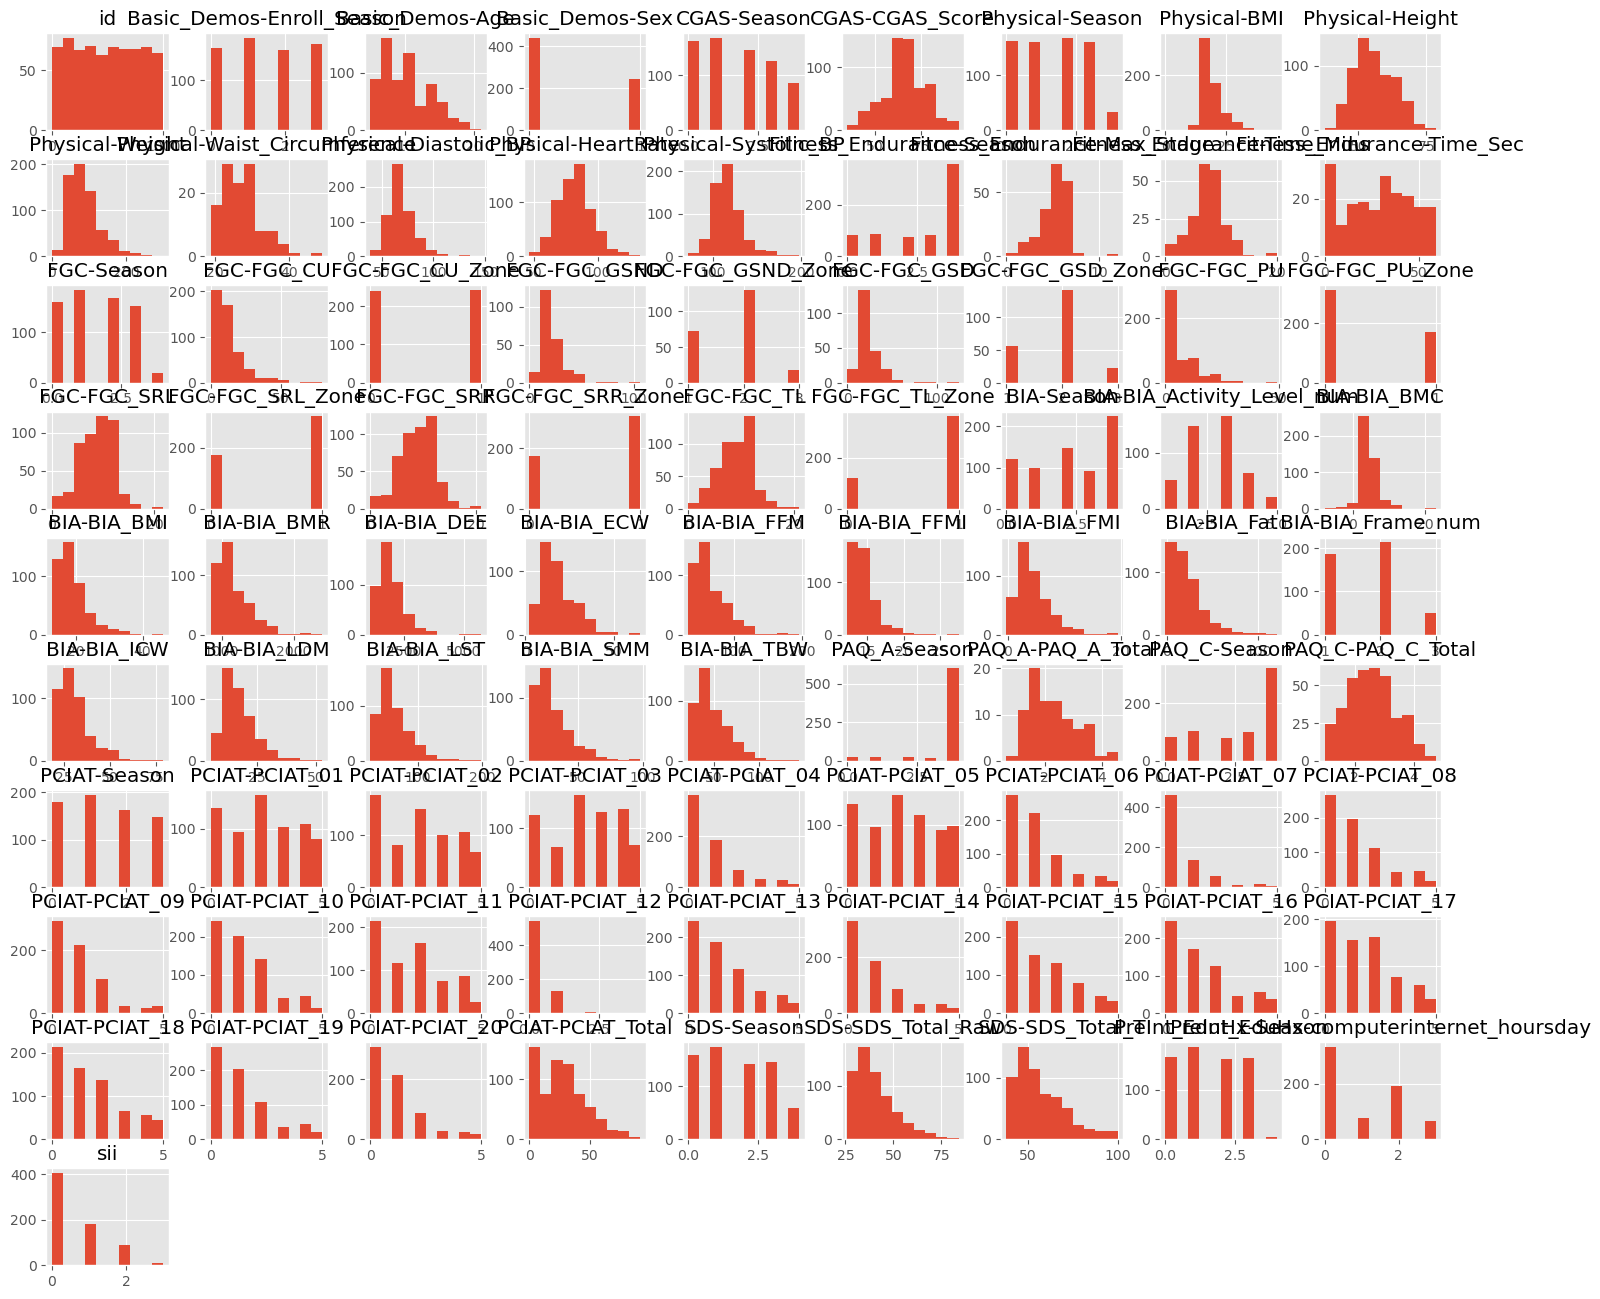

In [423]:
#Visualize Data:
# Produce histograms for variables (at least three variables). Analyze any patterns or distributions you observe
df_Childmi.iloc[:, :100].hist(figsize=(18, 16));

In [424]:
# Analyze Missing Values: Calculate the percentage of missing values in each variable
df_Childmi.isnull().sum()

id                                          0
Basic_Demos-Enroll_Season                   0
Basic_Demos-Age                             0
Basic_Demos-Sex                             0
CGAS-Season                                 0
CGAS-CGAS_Score                            85
Physical-Season                             0
Physical-BMI                               50
Physical-Height                            49
Physical-Weight                            39
Physical-Waist_Circumference              565
Physical-Diastolic_BP                      67
Physical-HeartRate                         65
Physical-Systolic_BP                       67
Fitness_Endurance-Season                    0
Fitness_Endurance-Max_Stage               482
Fitness_Endurance-Time_Mins               482
Fitness_Endurance-Time_Sec                483
FGC-Season                                  0
FGC-FGC_CU                                191
FGC-FGC_CU_Zone                           202
FGC-FGC_GSND                      

In [429]:
# Total Missing Values: Show the total number of missing values across all variables
(df_Childmi.isnull().sum().sum())

11114

In [431]:
# There is imbalance here, with 0 having over 400, 1 having 181 while 2 and 3 have almost none 

# I will try merging 1,2 and 3 and they will represent small, moderate and large effect from internet use 

# Define the mapping: leave 0 as is, merge 1, 2, and 3 into class 1
mapping = {0.0: 0, 1.0: 1, 2.0: 1, 3.0: 1}
df_Childmi["sii"] = df_Childmi["sii"].replace(mapping)

# Verify the new class counts
print(df_Childmi["sii"].value_counts())

sii
0.0    406
1.0    278
Name: count, dtype: int64


In [433]:
# print dataset
df_Childmi

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,0,5,0,3,51.0,0,16.877316,46.00,50.8,...,4.0,2.0,4.0,55.0,4,NaN,NaN,0,3.0,1.0
1,1,2,9,0,4,NaN,0,14.035590,48.00,46.0,...,0.0,0.0,0.0,0.0,0,46.0,64.0,2,0.0,0.0
2,2,2,10,1,0,71.0,0,16.648696,56.50,75.6,...,2.0,1.0,1.0,28.0,0,38.0,54.0,2,2.0,0.0
3,3,3,9,0,0,71.0,2,18.292347,56.00,81.6,...,3.0,4.0,1.0,44.0,2,31.0,45.0,3,0.0,1.0
5,5,1,13,1,3,50.0,2,22.279952,59.50,112.2,...,1.0,2.0,1.0,34.0,2,40.0,56.0,1,0.0,1.0
6,6,0,10,0,4,NaN,0,19.660760,55.00,84.6,...,4.0,1.0,0.0,20.0,3,27.0,40.0,0,3.0,0.0
11,11,0,11,0,2,66.0,4,NaN,NaN,NaN,...,0.0,1.0,0.0,10.0,3,42.0,59.0,0,0.0,0.0
12,12,0,13,0,4,NaN,3,21.079065,57.75,100.0,...,2.0,2.0,1.0,31.0,0,33.0,47.0,0,1.0,1.0
15,15,3,7,0,2,51.0,1,29.315775,54.00,121.6,...,3.0,3.0,1.0,58.0,1,35.0,50.0,3,2.0,1.0
16,16,1,5,1,2,80.0,1,17.284504,44.00,47.6,...,0.0,0.0,0.0,0.0,1,37.0,53.0,1,0.0,0.0


In [435]:
# Begin Imputation
#Impute 'sii' with mode and convert to int
#df_Childmi["sii"].fillna(df_Childmi["sii"].mode()[0], inplace=True)
df_Childmi["sii"] = df_Childmi["sii"].astype(int)

# Step 2: Impute the rest of the DataFrame (excluding 'sii')
df_Childmi.loc[:, df_Childmi.columns != "sii"] = DataFrameImputer().fit_transform(
    df_Childmi.loc[:, df_Childmi.columns != "sii"]
)

#Step 3: Apply forward fill and backward fill for any remaining missing values
#df_Childmi = df_Childmi.fillna(method='ffill').fillna(method='bfill')

In [437]:

# Impute Missing Values: Perform missing value imputation using the provided code snippet. Verify that there are no remaining missing values.
#Missing values imputation
from sklearn.base import TransformerMixin


class DataFrameImputer(TransformerMixin):
    def __init__(self):
       """Impute missing values.
        Columns of dtype object are imputed with the most frequent value
        in column.
        Columns of other types are imputed with mean of column.
        """  
    pass


# Impute missing values
# Create a series to store the fill values for each column
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
                        if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
    
        return self
    
    def transform(self, X, y=None):
    
# Fill missing values in X with the computed fill values
         return X.fillna(self.fill)


In [439]:
#Verify that there are no missing values 
(df_Childmi.isnull().sum().sum())

0

In [441]:
# Replace negatives with zero *only on numeric columns*
num_cols = train_x.select_dtypes(include="number").columns
train_x[num_cols] = train_x[num_cols].clip(lower=0)
test_x[num_cols]  = test_x[num_cols].clip(lower=0)

# Optional: verify nothing < 0 remains
assert (train_x[num_cols] < 0).sum().sum() == 0
assert (test_x[num_cols]  < 0).sum().sum() == 0

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

Now that all values have been imputated, it is be to apply one-hot encoding
One hot encoding will help the models have less bias especially in columns that contain categorical values like the seasons. The models will treat the numeric value for each season with weight. The smaller the value the less weight. This introduces bias in the models. One hot encoding will help ensure that these values are understood as "equal" seasons rather than a weighted number by the ML model. 

In [444]:
# Begin One-Hot Encoding 
# columns with title season have categorical values 
# print all season columns 
season_cols = [col for col in df_Childmi.columns if "Season" in col]
print("Season columns:", season_cols)

Season columns: ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']


In [446]:
# convert to strings 
df_Childmi[season_cols] = df_Childmi[season_cols].astype(str)

In [448]:
# One-Hot encoding 
df_encoded = pd.get_dummies(df_Childmi[season_cols], columns=season_cols, drop_first=True)

In [450]:
df_encoded


,Basic_Demos-Enroll_Season_1,Basic_Demos-Enroll_Season_2,Basic_Demos-Enroll_Season_3,CGAS-Season_1,CGAS-Season_2,CGAS-Season_3,CGAS-Season_4,Physical-Season_1,Physical-Season_2,Physical-Season_3,...,PCIAT-Season_2,PCIAT-Season_3,SDS-Season_1,SDS-Season_2,SDS-Season_3,SDS-Season_4,PreInt_EduHx-Season_1,PreInt_EduHx-Season_2,PreInt_EduHx-Season_3,PreInt_EduHx-Season_4
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
5,True,False,False,False,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
11,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
12,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
15,False,False,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
16,True,False,False,False,True,False,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False


In [452]:
df_final = pd.concat([df_Childmi.reset_index(drop=True),
                      df_encoded.reset_index(drop=True)], axis=1)

In [454]:
for column in df_final.columns:
    print(column)

id
Basic_Demos-Enroll_Season
Basic_Demos-Age
Basic_Demos-Sex
CGAS-Season
CGAS-CGAS_Score
Physical-Season
Physical-BMI
Physical-Height
Physical-Weight
Physical-Waist_Circumference
Physical-Diastolic_BP
Physical-HeartRate
Physical-Systolic_BP
Fitness_Endurance-Season
Fitness_Endurance-Max_Stage
Fitness_Endurance-Time_Mins
Fitness_Endurance-Time_Sec
FGC-Season
FGC-FGC_CU
FGC-FGC_CU_Zone
FGC-FGC_GSND
FGC-FGC_GSND_Zone
FGC-FGC_GSD
FGC-FGC_GSD_Zone
FGC-FGC_PU
FGC-FGC_PU_Zone
FGC-FGC_SRL
FGC-FGC_SRL_Zone
FGC-FGC_SRR
FGC-FGC_SRR_Zone
FGC-FGC_TL
FGC-FGC_TL_Zone
BIA-Season
BIA-BIA_Activity_Level_num
BIA-BIA_BMC
BIA-BIA_BMI
BIA-BIA_BMR
BIA-BIA_DEE
BIA-BIA_ECW
BIA-BIA_FFM
BIA-BIA_FFMI
BIA-BIA_FMI
BIA-BIA_Fat
BIA-BIA_Frame_num
BIA-BIA_ICW
BIA-BIA_LDM
BIA-BIA_LST
BIA-BIA_SMM
BIA-BIA_TBW
PAQ_A-Season
PAQ_A-PAQ_A_Total
PAQ_C-Season
PAQ_C-PAQ_C_Total
PCIAT-Season
PCIAT-PCIAT_01
PCIAT-PCIAT_02
PCIAT-PCIAT_03
PCIAT-PCIAT_04
PCIAT-PCIAT_05
PCIAT-PCIAT_06
PCIAT-PCIAT_07
PCIAT-PCIAT_08
PCIAT-PCIAT_09
PCIAT-

In [456]:
#Split the Data: Split the data into training (60%) and testing (40%) sets.
# importing train_teset_split from sklearn to split data between training and testing (x and y) 
# using target variable sii for our y 

from sklearn.model_selection  import train_test_split
attributes = [col for col in df_final.columns if col != "sii"]



In [458]:
train_x, test_x, train_y, test_y = train_test_split(df_final[attributes], df_final["sii"], test_size=0.4, random_state=123)

In [460]:
# showing the testing and training data 

print ("shapes")
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

print 

print ("sii classifier")
print (df_final["sii"].value_counts())
print (train_y.value_counts())
print (test_y.value_counts())

shapes
(410, 123)
(274, 123)
(410,)
(274,)
sii classifier
sii
0    406
1    278
Name: count, dtype: int64
sii
0    243
1    167
Name: count, dtype: int64
sii
0    163
1    111
Name: count, dtype: int64


In [462]:
# Build and Evaluate Models: Train different machine learning models (Decision Tree, Support Vector Machine, Naive Bayes) and evaluate their performance using f1-score, accuracy, precision, and recall.
# Determine which model performs best and explain why

# First Model: Decision Tree

#use library sklearn - most common machine learning library in python 
from sklearn import tree
# clf for classifier - create the model 
clf = tree.DecisionTreeClassifier()
# train/build model
clf = clf.fit(train_x, train_y)
# make prediction - use the method predict - give the model only the test_x
pred_y = clf.predict(test_x) 
# evaluate the prediction results - model will give the test_y
from sklearn.metrics import classification_report
for line in classification_report(test_y, pred_y).split("\n"):
    print (line)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       111

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274



In [464]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)#pred_y=[1,2,2,1,..........,2]
# evaluate the prediction results

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:1.0
accuracy:1.0
precision:1.0
recall:1.0


In [466]:
#look up negative values 
neg_count_per_col = (train_x.select_dtypes(include="number") < 0).sum()
neg_count_per_row = (train_x.select_dtypes(include="number") < 0).sum(axis=1)

print (neg_count_per_col)
print (neg_count_per_row)

id                                        0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS-CGAS_Score                           0
Physical-BMI                              0
Physical-Height                           0
Physical-Weight                           0
Physical-Waist_Circumference              0
Physical-Diastolic_BP                     0
Physical-HeartRate                        0
Physical-Systolic_BP                      0
Fitness_Endurance-Max_Stage               0
Fitness_Endurance-Time_Mins               0
Fitness_Endurance-Time_Sec                0
FGC-FGC_CU                                0
FGC-FGC_CU_Zone                           0
FGC-FGC_GSND                              0
FGC-FGC_GSND_Zone                         0
FGC-FGC_GSD                               0
FGC-FGC_GSD_Zone                          0
FGC-FGC_PU                                0
FGC-FGC_PU_Zone                           0
FGC-FGC_SRL                     

In [468]:
#Support Vector Machine 
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=123456)
# train/build model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.968609865470852
accuracy:0.9744525547445255
precision:0.972972972972973
recall:0.9642857142857143


In [470]:
# replace negative values with 0 - so models perform better
# Get only the numeric columns in your feature set - does not effect index row index - titles
num_cols = train_x.select_dtypes(include=[np.number]).columns

# Clip negatives to zero for those columns only
train_x[num_cols] = train_x[num_cols].clip(lower=0)
test_x[num_cols]  = test_x[num_cols].clip(lower=0)

In [472]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.7020408163265306
accuracy:0.7335766423357665
precision:0.7747747747747747
recall:0.6417910447761194


In [474]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.9821428571428571
accuracy:0.9854014598540146
precision:0.990990990990991
recall:0.9734513274336283


The Decision Tree model performed the worst. The perfect scores, 1.0 on every metric indicate over fitting. I was a bit dissapointed after all the pre processing of my data. 
The next three models performed better. The Logistic regression model performed the best with scores ranging from .97 to .99. The SVM model perofrmed similarly with scores ranging from .96 to .97. The Multinomial MB model performed ok with the most variance between scores, ranging from .64 to .77. Not sure what caused the big gap in this model. 

Next is to apply a Neural Network to our data. I utilize the tensorflow library. Tensorflow only accepts integers. A lot of the feature data was still being read as a string. Specifically the features with the word "Season". This caused an error when trying to run my neural network. 

I then made sure all columns with the word "Season" were changed to int8 0 and 1's. They were 0 and 1 already but were being read as strings using dummies.   

In [477]:
cat_cols = ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 
            'PreInt_EduHx-Season', 'Basic_Demos-Enroll_Season_1', 'Basic_Demos-Enroll_Season_2', 'Basic_Demos-Enroll_Season_3', 'CGAS-Season_1', 'CGAS-Season_2', 'CGAS-Season_3', 'CGAS-Season_4', 'Physical-Season_1', 'Physical-Season_2', 'Physical-Season_3', 'Physical-Season_4', 'Fitness_Endurance-Season_1', 'Fitness_Endurance-Season_2', 'Fitness_Endurance-Season_3', 'Fitness_Endurance-Season_4', 'FGC-Season_1', 'FGC-Season_2', 'FGC-Season_3', 'FGC-Season_4', 'BIA-Season_1', 'BIA-Season_2', 'BIA-Season_3', 'BIA-Season_4', 'PAQ_A-Season_1', 'PAQ_A-Season_2', 'PAQ_A-Season_3', 'PAQ_A-Season_4', 'PAQ_C-Season_1', 'PAQ_C-Season_2', 'PAQ_C-Season_3', 'PAQ_C-Season_4', 'PCIAT-Season_1', 'PCIAT-Season_2', 'PCIAT-Season_3', 'SDS-Season_1', 'SDS-Season_2', 'SDS-Season_3', 'SDS-Season_4', 'PreInt_EduHx-Season_1', 'PreInt_EduHx-Season_2', 'PreInt_EduHx-Season_3', 'PreInt_EduHx-Season_4']   # your original season cols

df_final = pd.get_dummies(
    df_final, columns=cat_cols,
    drop_first=False,        # keep all seasons if you like
    dtype="int8"             # forces 0/1 int instead of object
)

In [479]:
dummy_cols = [c for c in train_x.columns if c.endswith(tuple('_'+str(i) for i in range(5)))]
train_x[dummy_cols] = train_x[dummy_cols].astype("int8")
test_x[dummy_cols]  = test_x[dummy_cols].astype("int8")

In [481]:
# Make sure all features are now int8 
print(train_x.select_dtypes(exclude="number").columns)  # should be empty

Index(['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season'],
      dtype='object')


In [483]:
# continue to make sure all remaining features with "season" are changed to data type int8 
season_cols = [
    "Basic_Demos-Enroll_Season", "CGAS-Season", "Physical-Season",
    "Fitness_Endurance-Season",  "FGC-Season",  "BIA-Season",
    "PAQ_A-Season", "PAQ_C-Season", "PCIAT-Season",
    "SDS-Season",   "PreInt_EduHx-Season"
]

for df in (train_x, test_x):
    df[season_cols] = (
        df[season_cols]
          .apply(pd.to_numeric, errors="coerce")  # "3" → 3, bad strings → NaN
          .fillna(0)                              # if anything failed, set to 0
          .astype("int8")                         # compact integer dtype
    )

# confirm
print(train_x.select_dtypes(exclude="number").columns)   # should be empty

Index([], dtype='object')


-Tryed running scaler but model didnt perform as good. I decided to leave it as a note here as a possible pre processing tool in the future.
  
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
train_x  = scaler.fit_transform(train_x).astype("float32")
test_x   = scaler.transform(test_x).astype("float32")

In [486]:
# Since the training in neural networks is an iterative process, the training won’t just stop after it is done. 
# You have to specify the number of iterations you want the model to be training. Those completed iterations are commonly called epochs. 
# We want to run it for 100 epochs to be able to see how the training loss and accuracy are changing after each epoch.


history = model.fit(
    train_x,           # now all-numeric float array
    train_y,
    validation_data=(test_x, test_y),
    epochs=100,
    batch_size=10,
    #class_weight=class_weights,   # include if you computed them
    #callbacks=[early],            # EarlyStopping, optional
    verbose=1                     # watch training progress
)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8730 - loss: 0.6831 - val_accuracy: 0.9088 - val_loss: 0.3621
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.9051 - loss: 0.4427 - val_accuracy: 0.9307 - val_loss: 0.1432
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.9559 - loss: 0.1129 - val_accuracy: 0.9599 - val_loss: 0.0951
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9867 - loss: 0.0483 - val_accuracy: 0.9489 - val_loss: 0.1123
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.9774 - loss: 0.0618 - val_accuracy: 0.9599 - val_loss: 0.0924
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.9827 - loss: 0.0490 - val_accuracy: 0.9197 - val_loss: 0.1535
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.9844 - loss: 0.0668 - val_accuracy: 0.9526 - val_loss: 0.1015
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9837 - loss: 0.0407 - val_accura

Test accuracy: 0.901


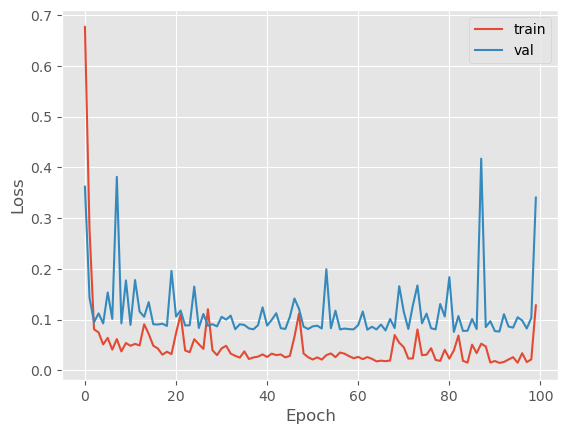

In [487]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

Model is performing very well as shown in the graph above. The model is trained well enough to make predicitions that are very close to the actual target.

In [491]:

import tensorflow as tf
print(tf.__version__)

2.19.0


In [493]:
from keras.models import Sequential
from keras import layers

input_dim = train_x.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [495]:
# use the method compile to to configuration 
# using binary_crossentropy because the target is binary , either 0 or 1 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy'])

In [497]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251 (4.89 KB)

 Trainable params: 1,251 (4.89 KB)

 Non-trainable params: 0 (0.00 B)

In [499]:

# epochs is the number of iterations 
# Batch size is the number of samples in each epoch 
history = model.fit(train_x, train_y,
                     epochs=100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size=10)

In [500]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 41}

In [501]:
history.history

{'accuracy': [0.5926828980445862,
  0.5365853905677795,
  0.5609756112098694,
  0.6487804651260376,
  0.6731707453727722,
  0.7317073345184326,
  0.7536585330963135,
  0.7219512462615967,
  0.7463414669036865,
  0.7487804889678955,
  0.8097561001777649,
  0.8365853428840637,
  0.8292682766914368,
  0.8658536672592163,
  0.8609756231307983,
  0.8292682766914368,
  0.8682926893234253,
  0.8560975790023804,
  0.8731707334518433,
  0.8829268217086792,
  0.8853658437728882,
  0.8975609540939331,
  0.8999999761581421,
  0.9097561240196228,
  0.8926829099655151,
  0.9268292784690857,
  0.9121951460838318,
  0.9195122122764587,
  0.9390243887901306,
  0.9365853667259216,
  0.9414634108543396,
  0.9317073225975037,
  0.8902438879013062,
  0.9317073225975037,
  0.9146341681480408,
  0.9439024329185486,
  0.9390243887901306,
  0.9536585211753845,
  0.9414634108543396,
  0.9609755873680115,
  0.9560975432395935,
  0.9439024329185486,
  0.9414634108543396,
  0.9634146094322205,
  0.9512194991111755

In [505]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

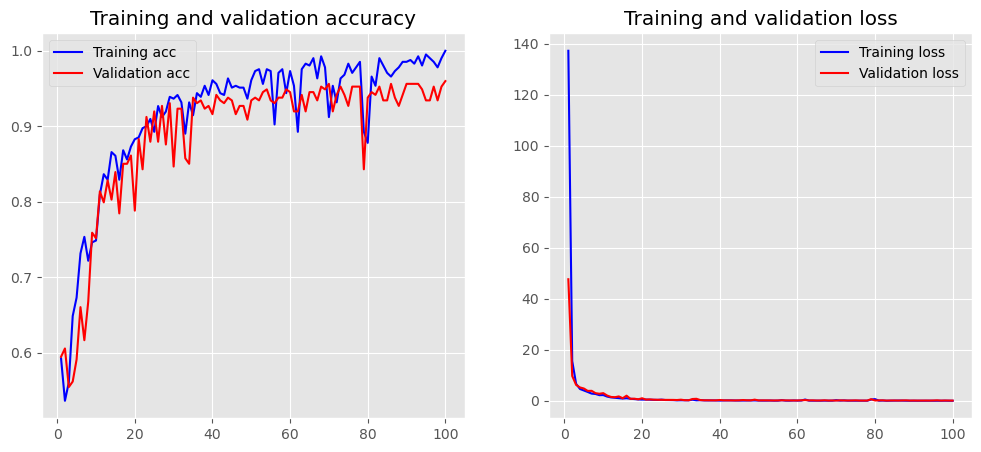

In [507]:
plot_history(history)

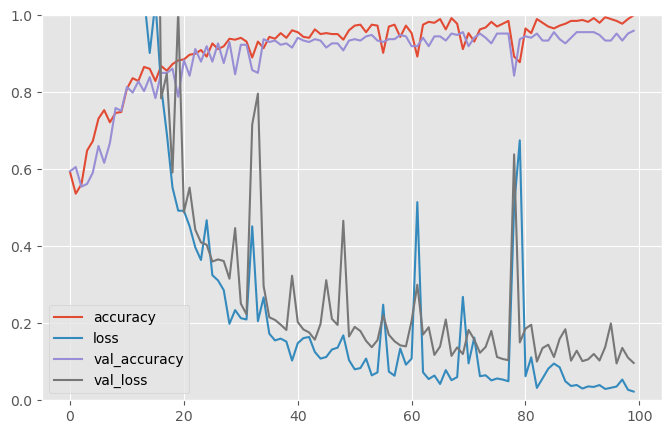

In [509]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [511]:
# to test the over fitting evaluate the model using the training data - model was very good using training data set - .99
# when evaluating model using testing data set .74 - this is a large gap - it is over fitting 

loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9951
Testing Accuracy:  0.9599


In [513]:
# Run the models again - no change 

In [515]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)#pred_y=[1,2,2,1,..........,2]
# evaluate the prediction results

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:1.0
accuracy:1.0
precision:1.0
recall:1.0


In [517]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf = clf.fit(train_x, train_y)
#df_importance = pd.DataFrame(zip(df_train_x.columns, clf.coef_[0]), columns=["feature", "weight"])
#df_importance.sort_values("weight", ascending=False)
pred_y = clf.predict(test_x)
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.9642857142857143
accuracy:0.9708029197080292
precision:0.972972972972973
recall:0.9557522123893806


In [519]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.7020408163265306
accuracy:0.7335766423357665
precision:0.7747747747747747
recall:0.6417910447761194


In [521]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.9821428571428571
accuracy:0.9854014598540146
precision:0.990990990990991
recall:0.9734513274336283


In [523]:
# Train only 200 of my data points because my dataset only contains 1000 - dont want to use to many to train 
X_valid, X_train = train_x[:200], train_x[200:]
y_valid, y_train = train_y[:200], train_y[200:]

In [525]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_valid, y_valid),
                     batch_size=10)

Now you can use the .evaluate() method to measure the accuracy of the model. You can do this both for the training data and testing data. We expect that the training data has a higher accuracy than for the testing data. Too longer you would train a neural network, the more likely it is that it starts overfitting.

Now let’s evaluate the accuracy of the model:

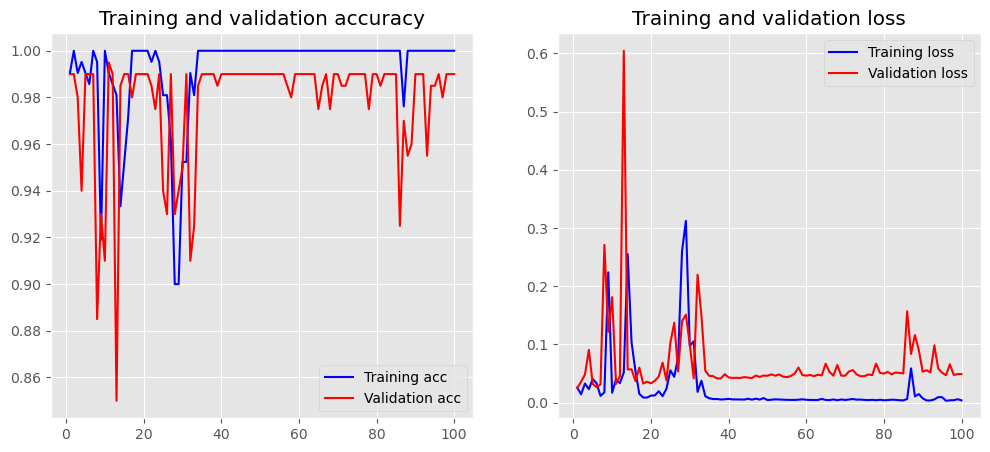

In [528]:
plot_history(history)

In [530]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9635


My Neural Network model performs very well over all. It has some outliers as seen in the graphs with the large spikes(in red). The data could use some more preprocessing possibly or more data as the actual study had more participants and data than the one I used from Kaggle. My model does a good job in predicting if someones internet use will have an impact on them or not. I think my project could help everyone at the very least be mindul of their own and their childrens internet use going forward. It could also be applied to aid features like 'parental controls' on devices. Some features could also ptentially be more valuable than others and some features in another study could also be colected that would better pin point what type of internet use caused an effect on the person and how much time on a specific internet application or website cause an effect. 